# Read Data

In [1]:
import pandas as pd
df = pd.read_csv('data/wine.csv')
df

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [2]:
df.describe()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [3]:
df.isnull().any()

,0
Alcohol,False
Malic_acid,False
Ash,False
Alcalinity,False
Magnesium,False
Phenols,False
Flavanoids,False
Nonflavanoids,False
Proanthocyanins,False
Color_intensity,False


In [4]:
features = df.columns[:-1]
labels = df.columns[-1]

# Plot

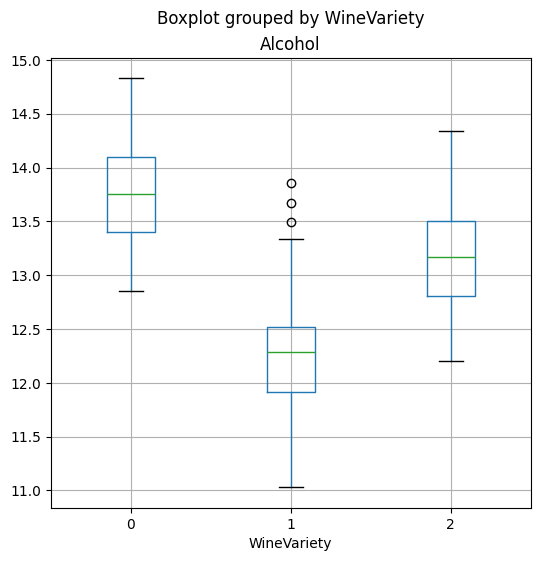

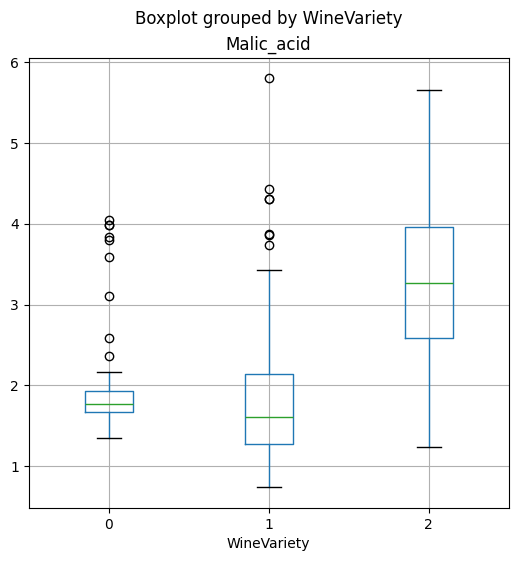

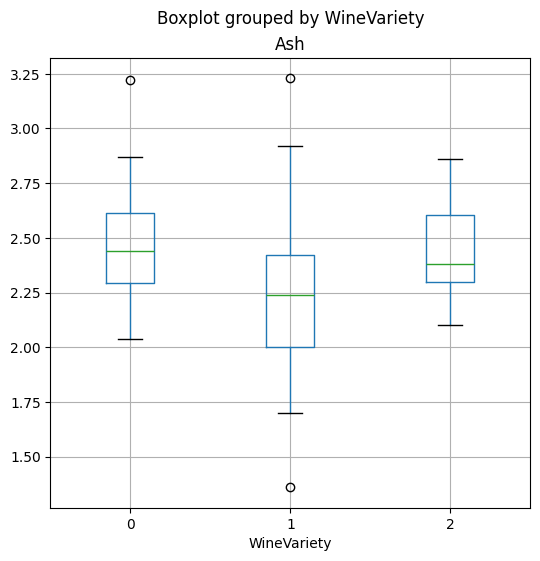

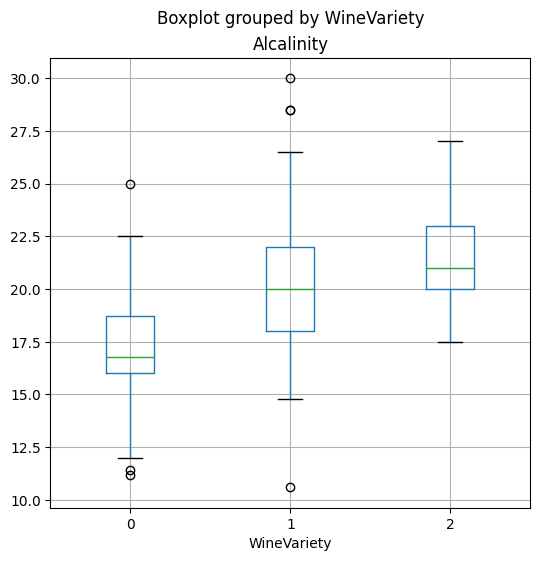

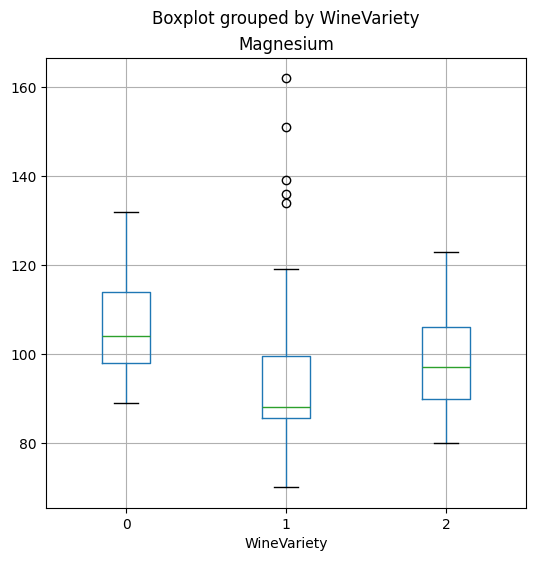

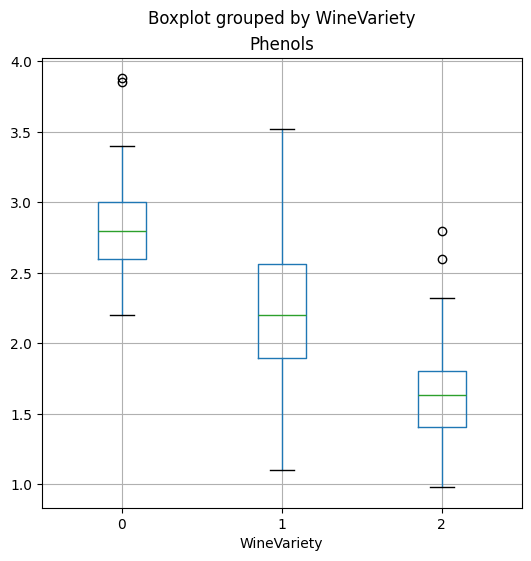

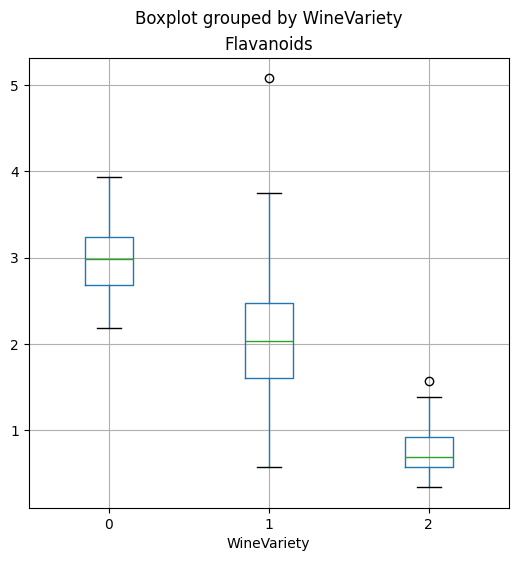

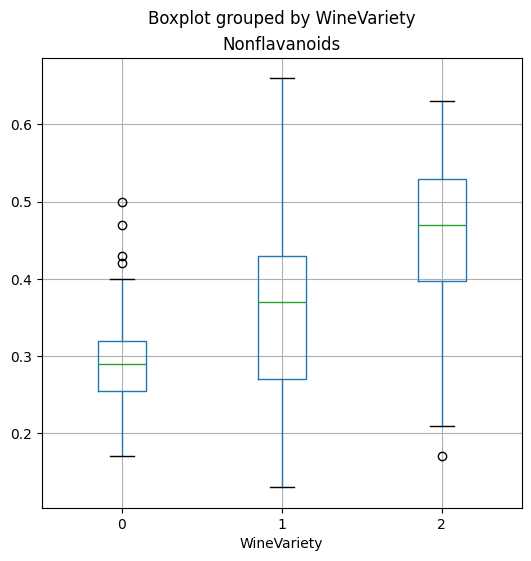

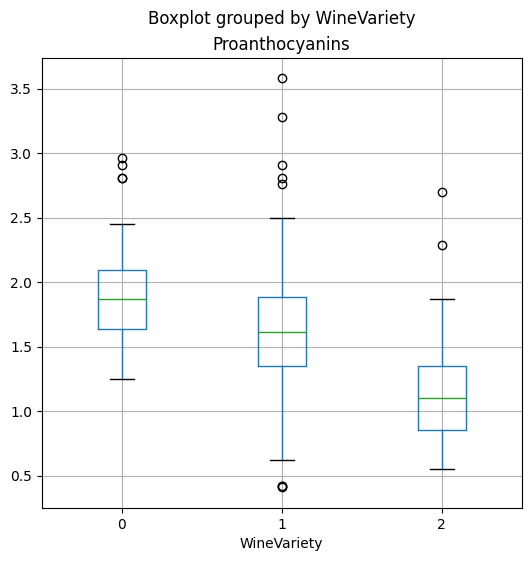

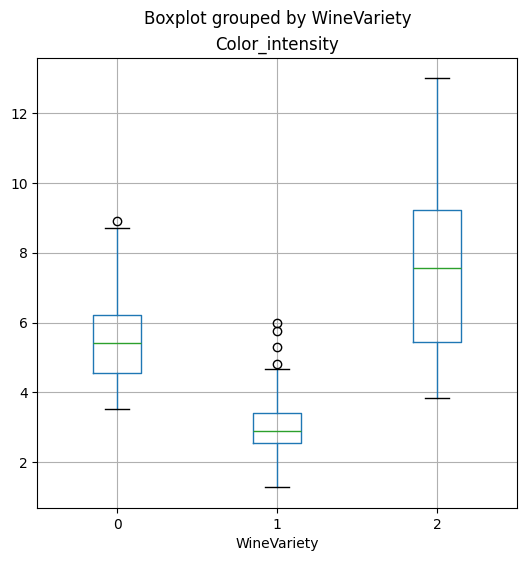

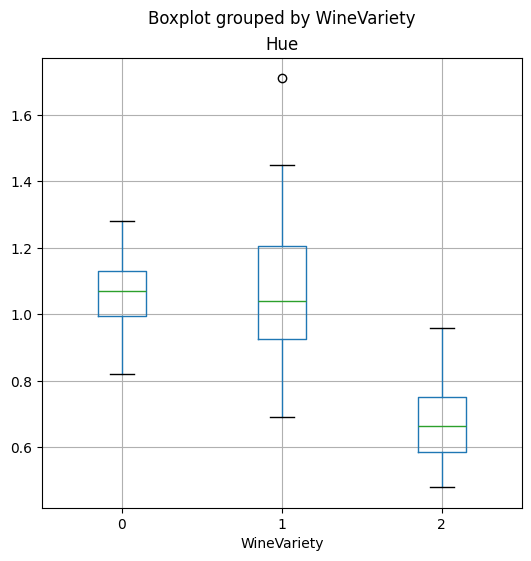

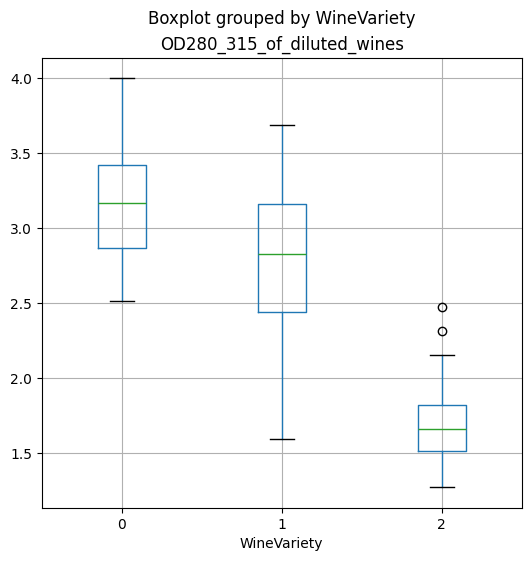

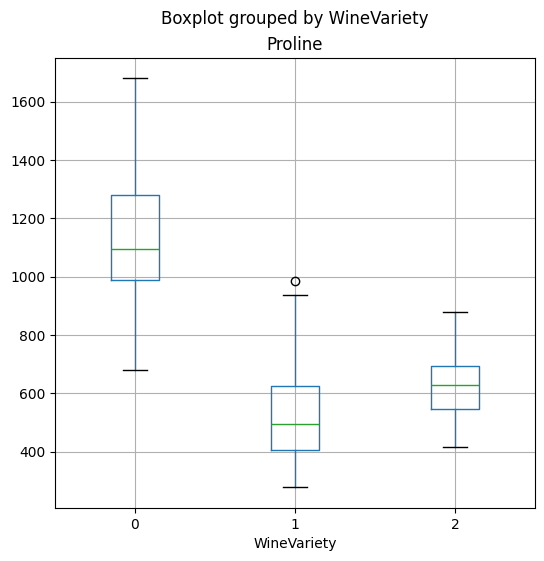

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

for feature in list(features):
    df.boxplot(column=feature, by=labels, figsize=(6,6))
    plt.title(feature)
plt.show()

# Train Model

Train test split

In [6]:
from sklearn.model_selection import train_test_split

X, y = df[features].values, df[labels].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=0, stratify=y
)

Pipeline (this is more of a smoke test than an optimized model)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

feature_columns = list(range(0,len(features)))
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(solver='lbfgs', multi_class='auto')
)])


model = pipeline.fit(X_train, y_train)
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12])])),
                ('regressor', LogisticRegression(multi_class='auto'))])


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# Evaulate Model

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0
Average AUC: 1.0


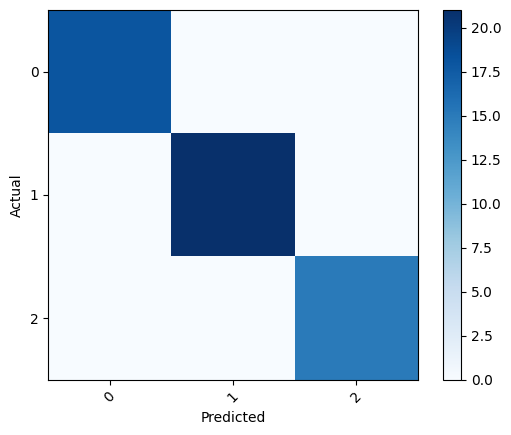

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import numpy as np

# Get predictions from test data
predictions = model.predict(X_test)
probs = model.predict_proba(X_test)

# Overall metrics
print("Overall Accuracy:", accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions, average='macro'))
print("Overall Recall:", recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test, probs, multi_class='ovr'))

# Confusion matrix
classes = [0, 1, 2]
mcm = confusion_matrix(y_test, predictions)
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

These results look too good to be true, so let's manually check

In [13]:
print (f"y_test\n{y_test}")
print (f"predictions\n{predictions}")

y_test
[0 1 0 0 1 2 1 2 0 2 0 1 2 0 2 2 0 0 2 1 0 2 1 1 1 1 0 2 2 1 0 2 0 1 1 0 1
 0 0 2 2 1 1 1 0 1 1 2 1 2 1 1 0 0]
predictions
[0 1 0 0 1 2 1 2 0 2 0 1 2 0 2 2 0 0 2 1 0 2 1 1 1 1 0 2 2 1 0 2 0 1 1 0 1
 0 0 2 2 1 1 1 0 1 1 2 1 2 1 1 0 0]
